# 单细胞scanpy测试


In [15]:
# -*- coding:utf-8 -*-
import scanpy as sc
import pandas as pd
import igraph

In [16]:
adata = sc.read_10x_mtx('C:/data/pbmc3k_filtered_gene_bc_matrices/filtered_gene_bc_matrices/hg19')

In [17]:
#数据读入和创建AnnData对象：
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [18]:
#计算线粒体基因含量：
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

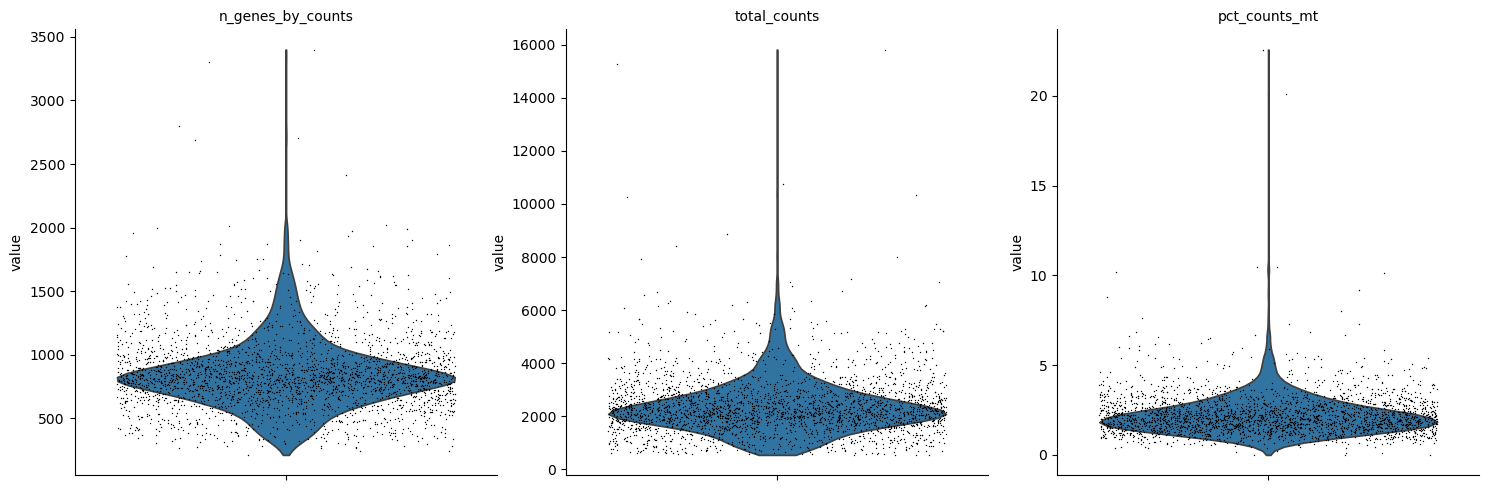

In [19]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [20]:
adata


View of AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [21]:
adata.X

<2638x13714 sparse matrix of type '<class 'numpy.float32'>'
	with 2238732 stored elements in Compressed Sparse Column format>

In [22]:
adata.var

,gene_ids,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,ENSG00000237683,9,False,9,0.003333,99.666667,9.0
AP006222.2,ENSG00000228463,3,False,3,0.001111,99.888889,3.0
RP11-206L10.2,ENSG00000228327,5,False,5,0.001852,99.814815,5.0
RP11-206L10.9,ENSG00000237491,3,False,3,0.001111,99.888889,3.0
LINC00115,ENSG00000225880,18,False,18,0.006667,99.333333,18.0
...,...,...,...,...,...,...,...
AC145212.1,ENSG00000215750,16,False,16,0.006667,99.407407,18.0
AL592183.1,ENSG00000220023,323,False,323,0.134815,88.037037,364.0
AL354822.1,ENSG00000215615,8,False,8,0.002963,99.703704,8.0
PNRC2-1,ENSG00000215700,110,False,110,0.042963,95.925926,116.0


In [23]:
 pd.DataFrame(adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)


,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,...,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2-1,SRSF10-1
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,33.0,1.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTGAGGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
TTTCTACTTCCTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
TTTGCATGAGAGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [24]:
adata.raw

In [25]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

C:\ProgramData\anaconda3\envs\scanpy\Lib\site-packages\scanpy\preprocessing\_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


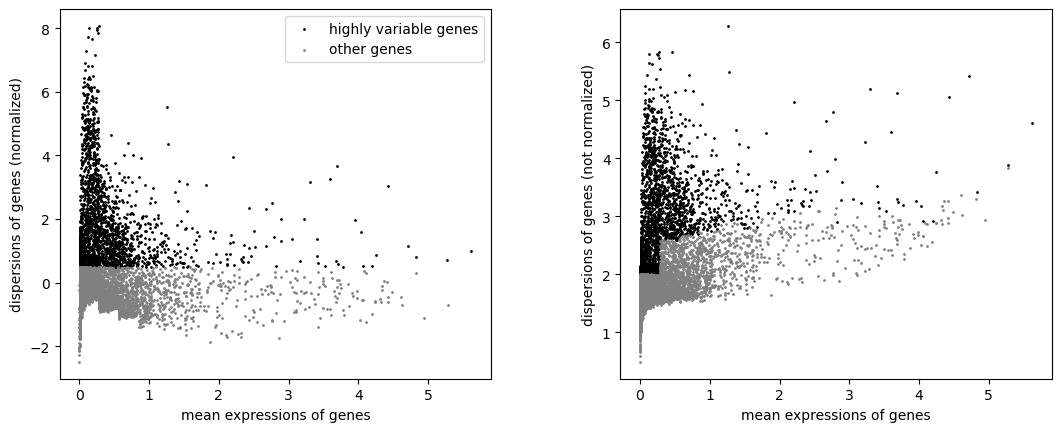

In [26]:
#特征选择：寻找高变基因
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
sc.pl.highly_variable_genes(adata)


In [27]:
 pd.DataFrame(adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)


,AL627309.1,AP006222.2,RP11-206L10.2,RP11-206L10.9,LINC00115,NOC2L,KLHL17,PLEKHN1,RP11-54O7.17,HES4,...,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL592183.1,AL354822.1,PNRC2-1,SRSF10-1
AAACATACAACCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.745718,1.635873,0.0,2.864242,0.0,0.000000,0.000000,0.0,0.0
AAACATTGAGCTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,4.223994,1.111715,0.0,2.851662,0.0,1.111715,0.000000,0.0,0.0
AAACATTGATCAGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.354503,1.995416,0.0,2.618163,0.0,0.000000,0.000000,0.0,0.0
AAACCGTGCTTCCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.566387,2.515108,2.149274,0.0,2.149274,0.0,0.000000,0.000000,0.0,0.0
AAACCGTGTATGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,3.063772,0.0,2.416278,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,1.358668,0.000000,0.0,1.358668,0.0,0.000000,0.000000,0.0,0.0
TTTCTACTGAGGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.362115,1.918229,1.362115,0.0,2.535106,0.0,0.000000,0.000000,0.0,0.0
TTTCTACTTCCTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.751096,0.000000,0.0,3.208946,0.0,0.000000,0.000000,0.0,0.0
TTTGCATGAGAGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.378132,0.000000,0.000000,0.0,2.378132,0.0,0.000000,2.378132,0.0,0.0


In [28]:
#归一化
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)

C:\ProgramData\anaconda3\envs\scanpy\Lib\site-packages\scanpy\preprocessing\_simple.py:641: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [29]:
 #pd.DataFrame(adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)

In [30]:
adata.X

array([[-0.17146961, -0.28081228, -0.04667677, ..., -0.20909513,
        -0.53120334,  0.12109362],
       [-0.21458236, -0.37265327, -0.05480441, ..., -0.31314582,
        -0.5966543 ,  0.17174267],
       [-0.3768877 , -0.29508454, -0.05752748, ..., -0.17087645,
         1.37899964, -0.05258293],
       ...,
       [-0.20708964, -0.25046421, -0.04639699, ..., -0.16106427,
         2.04149704,  0.31163428],
       [-0.19032848, -0.2263338 , -0.04399936, ..., -0.13521305,
        -0.48211104, -2.71728775],
       [-0.33378937, -0.25358772, -0.05271561, ..., -0.13032718,
        -0.47133784, -1.8521755 ]])

In [31]:
#sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

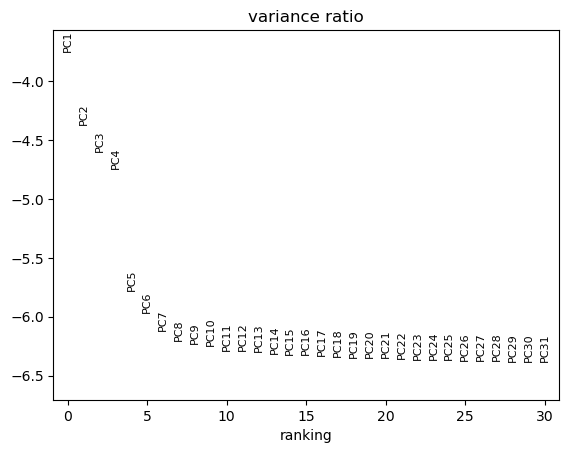

In [32]:
#数据降维
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

C:\ProgramData\anaconda3\envs\scanpy\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\envs\scanpy\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\envs\scanpy\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\envs\scanpy\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\envs\scanpy\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht

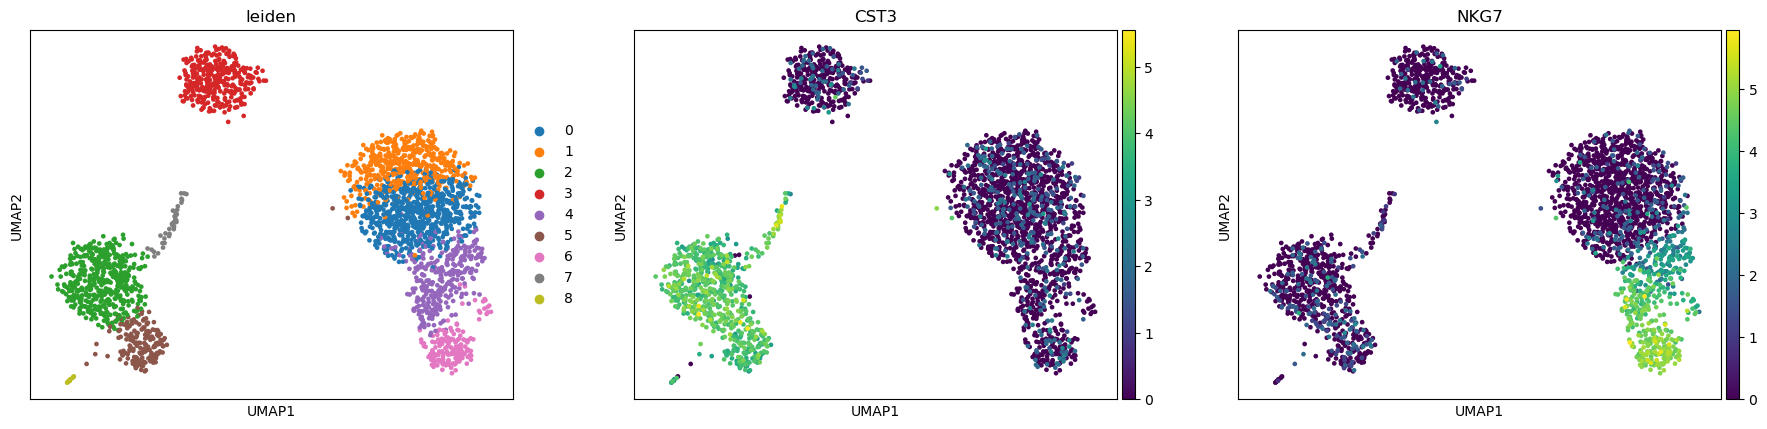

In [33]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.tsne(adata, n_pcs=40)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])

adata.write('test.h5ad')

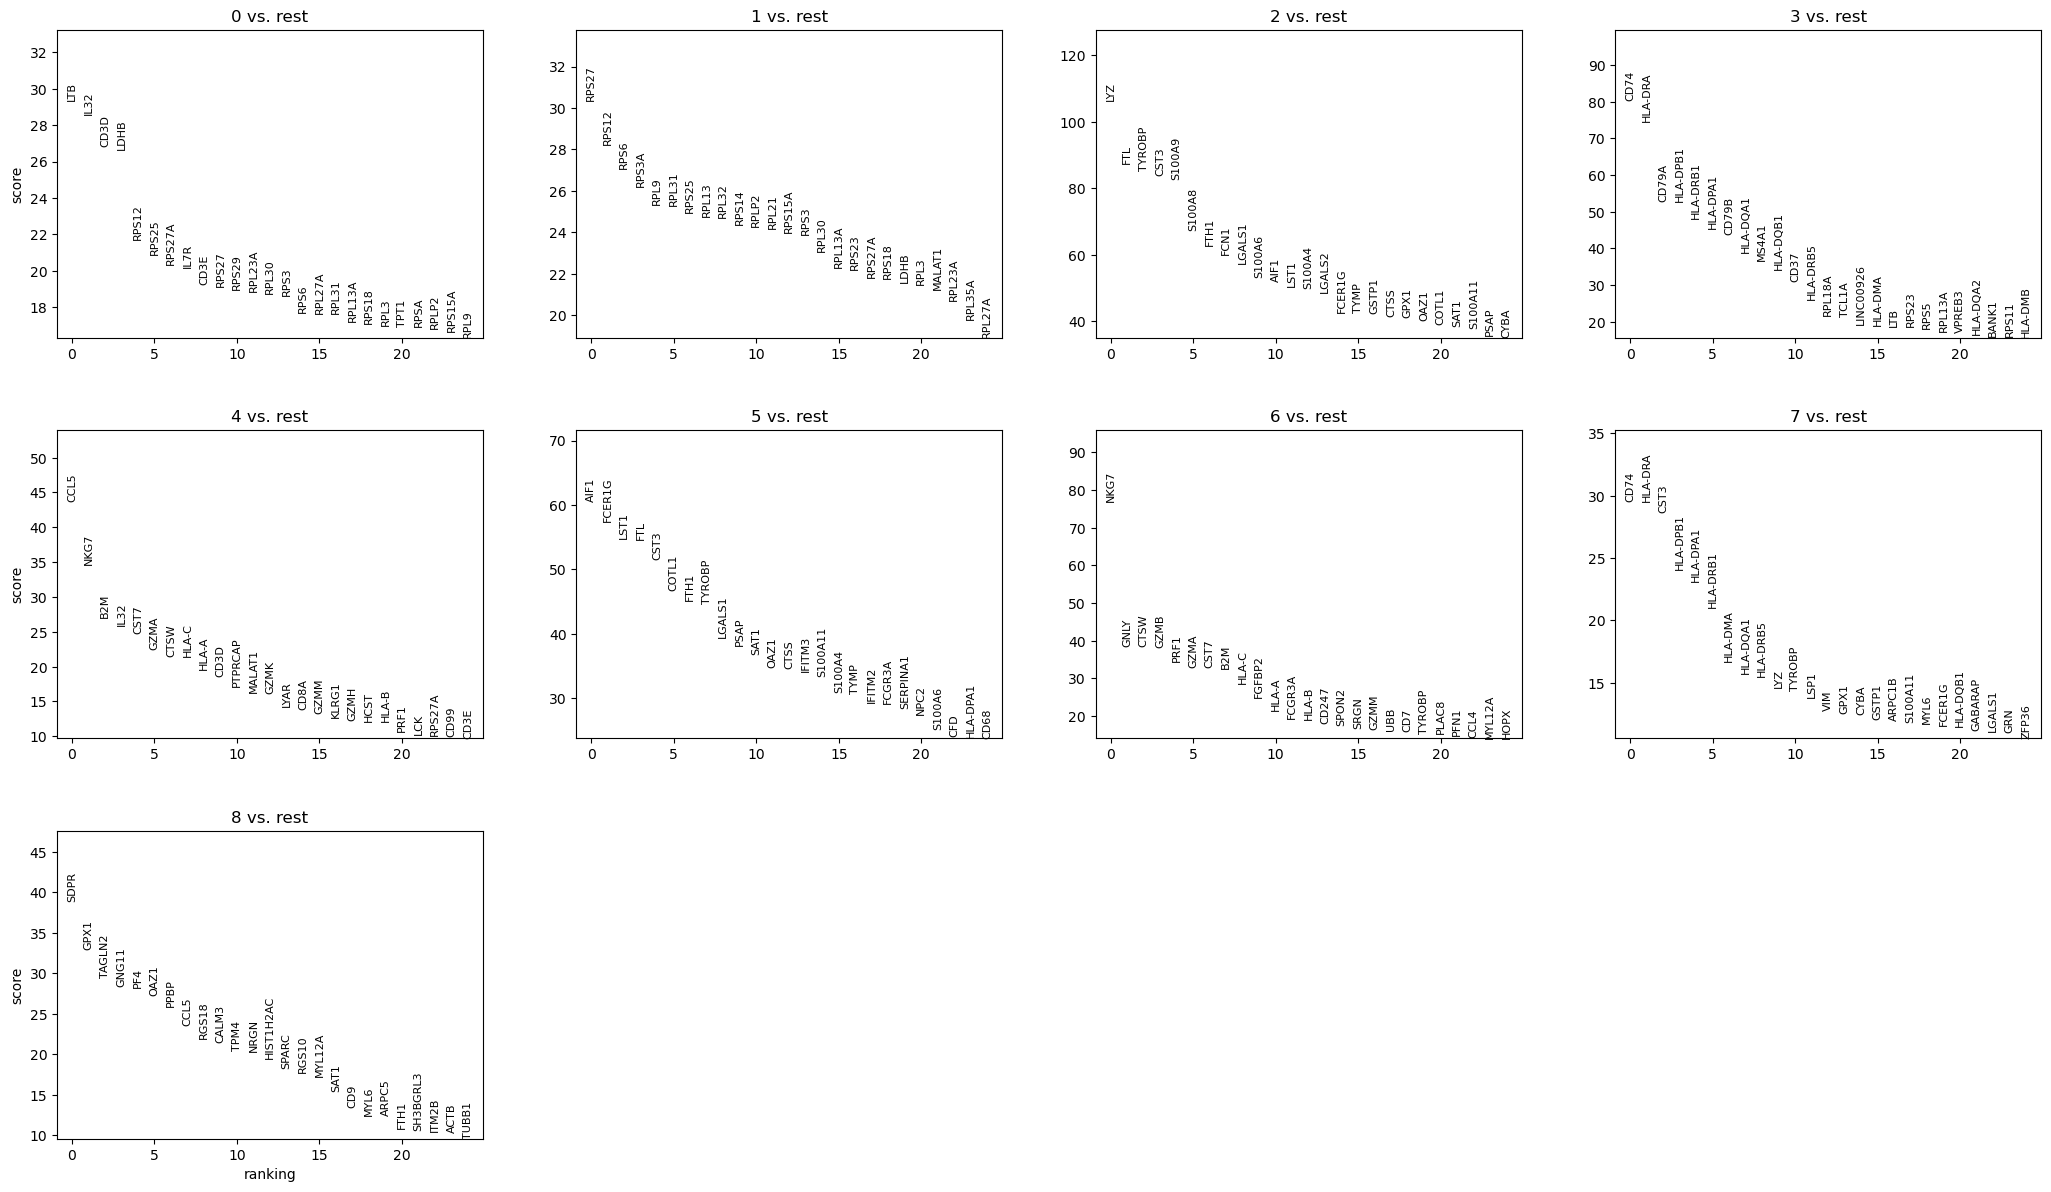

In [34]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

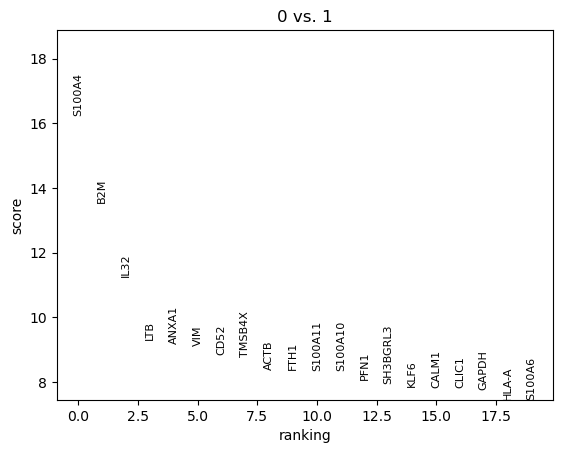

C:\ProgramData\anaconda3\envs\scanpy\Lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


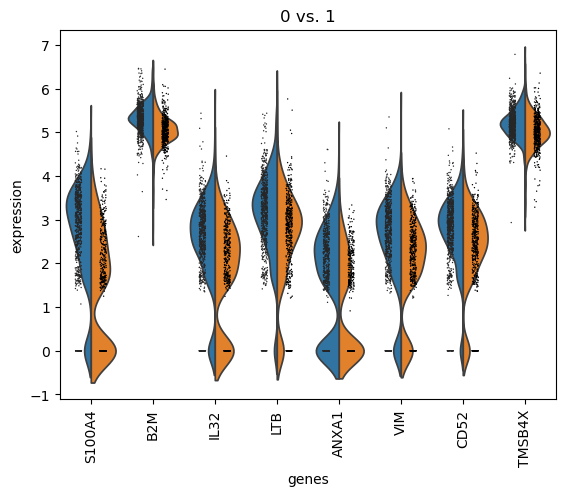

In [35]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

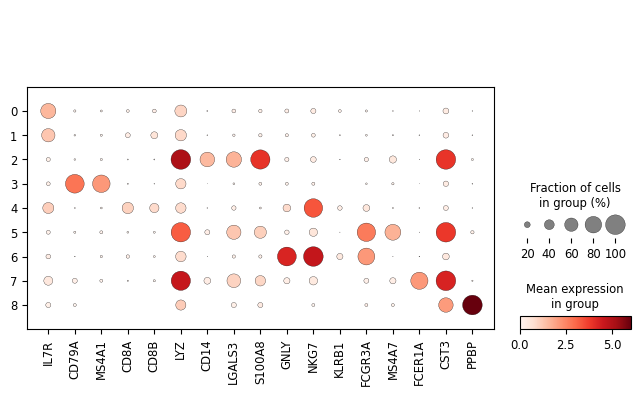

In [36]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14', 'LGALS3', 'S100A8',
'GNLY', 'NKG7', 'KLRB1', 'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']
sc.pl.dotplot(adata, marker_genes, groupby='leiden')


In [37]:
new_cluster_names_unique=list(set(new_cluster_names))
new_cluster_names_unique.sort(key=new_cluster_names.index)
celltype = [new_cluster_names[int(i)] for i in adata.obs.leiden.values.tolist()]
adata.obs.leiden = celltype
adata.obs.leiden = adata.obs.leiden.astype('category')
adata.obs.leiden.cat.set_categories(new_cluster_names_unique, inplace=True)
with plt.rc_context({'figure.figsize':(10, 10)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=True,
legend_fontsize='x-small')

sc.pl.dotplot(adata, marker_genes, groupby='leiden')

sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90)


NameError: name 'new_cluster_names' is not defined

In [ ]:
adata.X

In [ ]:

pd.DataFrame(adata.raw.X.toarray())

In [ ]:
aa=adata.raw.to_adata()

pd.DataFrame(aa.X.toarray())